In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

In [2]:
df = pd.read_csv('Airline_Delay_Cause.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   arr_flights          171426 non-null  float64
 6   arr_del15            171223 non-null  float64
 7   carrier_ct           171426 non-null  float64
 8   weather_ct           171426 non-null  float64
 9   nas_ct               171426 non-null  float64
 10  security_ct          171426 non-null  float64
 11  late_aircraft_ct     171426 non-null  float64
 12  arr_cancelled        171426 non-null  float64
 13  arr_diverted         171426 non-null  float64
 14  arr_delay            171426 non-null  float64
 15  carrier_delay    

,year,month,carrier,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [3]:
# Drop rows with missing key columns needed for target/label creation
df = df.dropna(subset=["arr_delay", "arr_flights", "arr_del15"]).reset_index(drop=True)

# Remove rows where arr_flights is zero to avoid division by zero
df = df[df["arr_flights"] > 0].reset_index(drop=True)

print("Dataset shape after cleaning:", df.shape)
print(df.head())

Dataset shape after cleaning: (171223, 20)
   year  month carrier       carrier_name airport  arr_flights  arr_del15  \
0  2023      8      9E  Endeavor Air Inc.     ABE         89.0       13.0   
1  2023      8      9E  Endeavor Air Inc.     ABY         62.0       10.0   
2  2023      8      9E  Endeavor Air Inc.     AEX         62.0       10.0   
3  2023      8      9E  Endeavor Air Inc.     AGS         66.0       12.0   
4  2023      8      9E  Endeavor Air Inc.     ALB         92.0       22.0   

   carrier_ct  weather_ct  nas_ct  security_ct  late_aircraft_ct  \
0        2.25        1.60    3.16          0.0              5.99   
1        1.97        0.04    0.57          0.0              7.42   
2        2.73        1.18    1.80          0.0              4.28   
3        3.69        2.27    4.47          0.0              1.57   
4        7.76        0.00    2.96          0.0             11.28   

   arr_cancelled  arr_diverted  arr_delay  carrier_delay  weather_delay  \
0         

In [4]:
# One-hot encode categorical and object features
cat_cols = df.select_dtypes(include=["object", "category"]).columns
print("\nCategorical columns:", list(cat_cols))

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()


Categorical columns: ['carrier', 'carrier_name', 'airport']


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,...,airport_VLD,airport_VPS,airport_WRG,airport_WYS,airport_XNA,airport_XWA,airport_YAK,airport_YKM,airport_YNG,airport_YUM
0,2023,8,89.0,13.0,2.25,1.60,3.16,0.0,5.99,2.0,...,False,False,False,False,False,False,False,False,False,False
1,2023,8,62.0,10.0,1.97,0.04,0.57,0.0,7.42,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2023,8,62.0,10.0,2.73,1.18,1.80,0.0,4.28,1.0,...,False,False,False,False,False,False,False,False,False,False
3,2023,8,66.0,12.0,3.69,2.27,4.47,0.0,1.57,1.0,...,False,False,False,False,False,False,False,False,False,False
4,2023,8,92.0,22.0,7.76,0.00,2.96,0.0,11.28,2.0,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Create target variables 
X = df_encoded.drop("arr_delay", axis=1)
y = df_encoded["arr_delay"]

In [6]:
# Split into train / validation / test with 20% val and 10% test (random_state=42)
# Training Set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=2/9, random_state=42
)

In [7]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Linear Regression Model
linreg = LinearRegression()
start_time = time.time()
linreg.fit(X_train_scaled, y_train)
end_time = time.time()
train_time = end_time - start_time
print(f"Training time: {train_time:.4f} seconds")

# Predictions
y_pred = linreg.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")

Training time: 1.8043 seconds
Mean Squared Error: 0.2853
Mean Absolute Error: 0.2772
R-squared: 1.0000


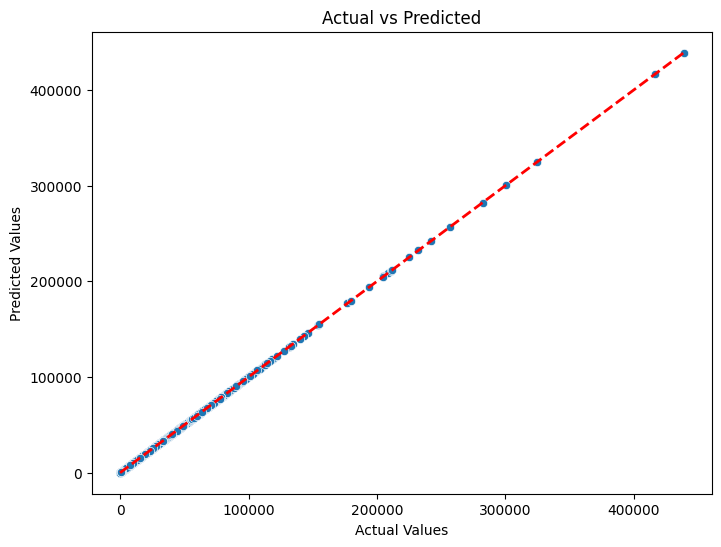

In [9]:
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()